In [3]:
'''
python3 mavproxy.py --master=/dev/ttyUSB0 --baudrate 921600 --aircraft MyCopter

module load log
log list
log download 3
log download all
log erase

'''
import os
import sys
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
from LatLongUTMconversion import LLtoUTM, UTMtoLL
import mission_plan as mp
from pymavlink import mavutil
import pandas as pd


In [4]:
# Function definitions

def dist_2points(x1, y1, x2, y2):
    distance = math.sqrt(((x1-x2)**2)+((y1-y2)**2))
    return distance

def get_offset_coords(x, y, slope, dist):
    new_x = x + dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    new_y = y + slope*dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    return(new_x,new_y)

In [5]:
# allow import from the parent directory, where mavlink.py is
# sys.path.insert(0, os.path.join(os.path.dirname(os.path.realpath(__file__)), '..'))

log_dir = '/home/user1/Downloads/APM_MAY27Flights/LOGS/'
filename = log_dir + "00000010.BIN"
notimestamps = True
planner_format = True
m_type=['GPA', 'GPS', 'AHR2', 'POS']
mlog = mavutil.mavlink_connection(filename, planner_format,
                                  notimestamps,
                                  robust_parsing=True)
if True:
    while True:
        m = mlog.recv_match(condition=None, type=m_type, blocking=True)
        #m = mlog.recv_match(condition=None, blocking=True)
        if m is None:
            break
        if notimestamps:
            print("%s" % m)
        else:
            print("%s.%02u: %s" % (
                time.strftime("%Y-%m-%d %H:%M:%S",
                              time.localtime(m._timestamp)),
                int(m._timestamp*100.0)%100, m))

AHR2 {TimeUS : 119130020, Roll : 2.22, Pitch : 0.23, Yaw : 20.44, Alt : 5.089999675750732, Lat : 41.3907435, Lng : -73.9533983, Q1 : 0.9839511513710022, Q2 : 0.018749743700027466, Q3 : 0.0055020274594426155, Q4 : 0.17736491560935974}
POS {TimeUS : 119130046, Lat : 41.390743, Lng : -73.9533981, Alt : 4.839999675750732, RelHomeAlt : 0.11924028396606445, RelOriginAlt : 0.4092402756214142}
GPS {TimeUS : 119172957, Status : 3, GMS : 336293600, GWk : 2107, NSats : 12, HDop : 0.9400000000000001, Lat : 41.3907437, Lng : -73.9533984, Alt : 4.32, Spd : 0.14500001072883606, GCrs : 0.0, VZ : -0.0820000022649765, Yaw : 0.0, U : 1}
GPA {TimeUS : 119172957, VDop : 1.67, HAcc : 1.33, VAcc : 2.05, SAcc : 0.7000000000000001, YAcc : 0.0, VV : 1, SMS : 119146, Delta : 200}
AHR2 {TimeUS : 119230052, Roll : 2.21, Pitch : 0.19, Yaw : 20.43, Alt : 5.029999732971191, Lat : 41.3907437, Lng : -73.9533984, Q1 : 0.9839586615562439, Q2 : 0.01869828999042511, Q3 : 0.005071746185421944, Q4 : 0.17734135687351227}
POS 

AHR2 {TimeUS : 201633933, Roll : 1.1400000000000001, Pitch : 2.13, Yaw : 299.32, Alt : 22.600000381469727, Lat : 41.3914392, Lng : -73.952941, Q1 : 0.8627554774284363, Q2 : 0.018066897988319397, Q3 : 0.011048762127757072, Q4 : -0.5051777362823486}
POS {TimeUS : 201633959, Lat : 41.3914416, Lng : -73.9529386, Alt : 21.989999771118164, RelHomeAlt : 17.263973236083984, RelOriginAlt : 17.553974151611328}
AHR2 {TimeUS : 201738867, Roll : 1.05, Pitch : 2.06, Yaw : 298.95, Alt : 22.559999465942383, Lat : 41.3914392, Lng : -73.952941, Q1 : 0.8611785173416138, Q2 : 0.017105842009186745, Q3 : 0.010842601768672466, Q4 : -0.5078990459442139}
POS {TimeUS : 201738894, Lat : 41.3914446, Lng : -73.9529372, Alt : 21.989999771118164, RelHomeAlt : 17.268585205078125, RelOriginAlt : 17.55858612060547}
GPS {TimeUS : 201781043, Status : 3, GMS : 336376200, GWk : 2107, NSats : 13, HDop : 0.86, Lat : 41.391444899999996, Lng : -73.9529384, Alt : 16.38, Spd : 3.3410000801086426, GCrs : 18.491159439086914, VZ : 

POS {TimeUS : 276847235, Lat : 41.390746, Lng : -73.9533903, Alt : 21.979999542236328, RelHomeAlt : 17.2515811920166, RelOriginAlt : 17.541582107543945}
AHR2 {TimeUS : 276953059, Roll : 4.42, Pitch : 0.46, Yaw : 107.81, Alt : 22.149999618530273, Lat : 41.3907482, Lng : -73.95338989999999, Q1 : 0.5887748003005981, Q2 : 0.01951717771589756, Q3 : 0.03358987718820572, Q4 : 0.8073630928993225}
POS {TimeUS : 276953157, Lat : 41.3907461, Lng : -73.9533903, Alt : 21.969999313354492, RelHomeAlt : 17.248544692993164, RelOriginAlt : 17.538545608520508}
GPS {TimeUS : 276983165, Status : 3, GMS : 336451400, GWk : 2107, NSats : 13, HDop : 0.86, Lat : 41.3907488, Lng : -73.9533901, Alt : 16.8, Spd : 0.2760000228881836, GCrs : 116.3199691772461, VZ : -0.28700000047683716, Yaw : 0.0, U : 1}
GPA {TimeUS : 276983165, VDop : 1.47, HAcc : 2.12, VAcc : 4.0200000000000005, SAcc : 0.53, YAcc : 0.0, VV : 1, SMS : 276956, Delta : 200}
AHR2 {TimeUS : 277056904, Roll : 3.85, Pitch : 0.3, Yaw : 107.95, Alt : 21.79

POS {TimeUS : 1145383284, Lat : 41.3906518, Lng : -73.95327929999999, Alt : 22.03999900817871, RelHomeAlt : 17.030330657958984, RelOriginAlt : 17.600330352783203}
GPS {TimeUS : 1145413586, Status : 3, GMS : 337319800, GWk : 2107, NSats : 14, HDop : 0.78, Lat : 41.3906523, Lng : -73.9532797, Alt : 18.01, Spd : 0.09000000357627869, GCrs : 142.2125701904297, VZ : 0.0, Yaw : 0.0, U : 1}
GPA {TimeUS : 1145413586, VDop : 1.29, HAcc : 0.66, VAcc : 1.26, SAcc : 0.17, YAcc : 0.0, VV : 1, SMS : 1145386, Delta : 200}
AHR2 {TimeUS : 1145486719, Roll : 1.06, Pitch : 4.3, Yaw : 20.93, Alt : 22.479999542236328, Lat : 41.3906523, Lng : -73.9532797, Q1 : 0.9826874136924744, Q2 : 0.0023269494995474815, Q3 : 0.03865710645914078, Q4 : 0.18117845058441162}
POS {TimeUS : 1145486746, Lat : 41.3906518, Lng : -73.95327929999999, Alt : 22.03999900817871, RelHomeAlt : 17.034849166870117, RelOriginAlt : 17.604848861694336}
AHR2 {TimeUS : 1145591506, Roll : 1.47, Pitch : 4.67, Yaw : 21.01, Alt : 23.010000228881836

POS {TimeUS : 1224250070, Lat : 41.391433, Lng : -73.9531648, Alt : 22.25, RelHomeAlt : 17.24730682373047, RelOriginAlt : 17.817306518554688}
AHR2 {TimeUS : 1224356009, Roll : 9.35, Pitch : 3.2, Yaw : 110.62, Alt : 22.219999313354492, Lat : 41.3914384, Lng : -73.9531623, Q1 : 0.5688402056694031, Q2 : 0.023447643965482712, Q3 : 0.08290857076644897, Q4 : 0.8179225921630859}
POS {TimeUS : 1224356035, Lat : 41.39143, Lng : -73.9531662, Alt : 22.25, RelHomeAlt : 17.248384475708008, RelOriginAlt : 17.818384170532227}
GPS {TimeUS : 1224431243, Status : 3, GMS : 337398800, GWk : 2107, NSats : 15, HDop : 0.71, Lat : 41.391432599999995, Lng : -73.95316509999999, Alt : 16.94, Spd : 3.44700026512146, GCrs : 199.5363006591797, VZ : -0.07200000435113907, Yaw : 0.0, U : 1}
GPA {TimeUS : 1224431243, VDop : 1.22, HAcc : 0.6, VAcc : 1.12, SAcc : 0.18, YAcc : 0.0, VV : 1, SMS : 1224392, Delta : 200}
AHR2 {TimeUS : 1224459778, Roll : 9.8, Pitch : 3.36, Yaw : 110.45, Alt : 22.59000015258789, Lat : 41.39143

GPS {TimeUS : 1868237965, Status : 3, GMS : 338042600, GWk : 2107, NSats : 13, HDop : 0.9, Lat : 41.3907418, Lng : -73.9534117, Alt : -1.73, Spd : 0.07200000435113907, GCrs : 48.248409271240234, VZ : -0.06800000369548798, Yaw : 0.0, U : 1}
GPA {TimeUS : 1868237965, VDop : 1.47, HAcc : 2.41, VAcc : 4.28, SAcc : 0.56, YAcc : 0.0, VV : 1, SMS : 1868207, Delta : 200}
AHR2 {TimeUS : 1868278779, Roll : 1.99, Pitch : 0.73, Yaw : 20.84, Alt : 10.769999504089355, Lat : 41.3907418, Lng : -73.9534117, Q1 : 0.983354389667511, Q2 : 0.015920178964734077, Q3 : 0.009486190974712372, Q4 : 0.18075062334537506}
POS {TimeUS : 1868278805, Lat : 41.3907435, Lng : -73.95341239999999, Alt : 9.960000038146973, RelHomeAlt : 4.522714138031006, RelOriginAlt : 5.522714138031006}
AHR2 {TimeUS : 1868382908, Roll : 2.36, Pitch : 0.5, Yaw : 20.650000000000002, Alt : 10.829999923706055, Lat : 41.3907418, Lng : -73.9534117, Q1 : 0.983597457408905, Q2 : 0.019509300589561462, Q3 : 0.008050473406910896, Q4 : 0.179138809442

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
gps_list =[]
gpa_list =[]
pos_list =[]
ahr2_list = []


while True:
    m = mlog.recv_match(condition=None, type=m_type, blocking=True)
    if m is None:
        break    
    elif m.get_type() == 'AHR2':
        print("%s" % m)
        ahr2_list.append(m.to_dict())
    elif m.get_type() == 'GPS':
        print("%s" % m)
        gps_list.append(m.to_dict())
    elif m.get_type() == 'GPA':
        print("%s" % m)
        gpa_list.append(m.to_dict())
    elif m.get_type() == 'POS':
        print("%s" % m)
        pos_list.append(m.to_dict())
        


In [5]:
for item in ahr2_list:     
    print('%.7f, %.7f ' %(item['Lat'], item['Lng']))


41.3907435, -73.9533983 
41.3907437, -73.9533984 
41.3907437, -73.9533984 
41.3907439, -73.9533986 
41.3907439, -73.9533986 
41.3907440, -73.9533986 
41.3907440, -73.9533986 
41.3907440, -73.9533986 
41.3907440, -73.9533986 
41.3907441, -73.9533987 
41.3907441, -73.9533987 
41.3907441, -73.9533988 
41.3907441, -73.9533988 
41.3907443, -73.9533989 
41.3907443, -73.9533989 
41.3907444, -73.9533988 
41.3907444, -73.9533988 
41.3907445, -73.9533987 
41.3907445, -73.9533987 
41.3907445, -73.9533986 
41.3907445, -73.9533986 
41.3907444, -73.9533986 
41.3907444, -73.9533986 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907443, -73.9533985 
41.3907443, -73.9533985 
41.3907444, -73.9533985 
41.3907444, -73.9533985 
41.3907443, -73.9533984 
41.3907443, -73.9533984 
41.3907442, -73.9533985 
41.3907442, -73.9533985 
41.3907443, -73.9533988 
41.3907443, -73.9533988 
41.3907446, -73.9533990 
41.3907446, -73.9533990 
41.3907447, -73.9533991 


41.3910419, -73.9533603 
41.3910419, -73.9533603 
41.3910367, -73.9533627 
41.3910367, -73.9533627 
41.3910317, -73.9533652 
41.3910317, -73.9533652 
41.3910269, -73.9533678 
41.3910269, -73.9533678 
41.3910218, -73.9533703 
41.3910218, -73.9533703 
41.3910164, -73.9533730 
41.3910110, -73.9533755 
41.3910110, -73.9533755 
41.3910056, -73.9533781 
41.3910056, -73.9533781 
41.3909999, -73.9533806 
41.3909999, -73.9533806 
41.3909945, -73.9533832 
41.3909945, -73.9533832 
41.3909889, -73.9533859 
41.3909889, -73.9533859 
41.3909834, -73.9533884 
41.3909834, -73.9533884 
41.3909780, -73.9533910 
41.3909780, -73.9533910 
41.3909723, -73.9533938 
41.3909723, -73.9533938 
41.3909666, -73.9533966 
41.3909666, -73.9533966 
41.3909612, -73.9533996 
41.3909612, -73.9533996 
41.3909556, -73.9534025 
41.3909501, -73.9534056 
41.3909501, -73.9534056 
41.3909445, -73.9534086 
41.3909445, -73.9534086 
41.3909390, -73.9534115 
41.3909390, -73.9534115 
41.3909334, -73.9534144 
41.3909334, -73.9534144 


<IPython.core.display.Javascript object>


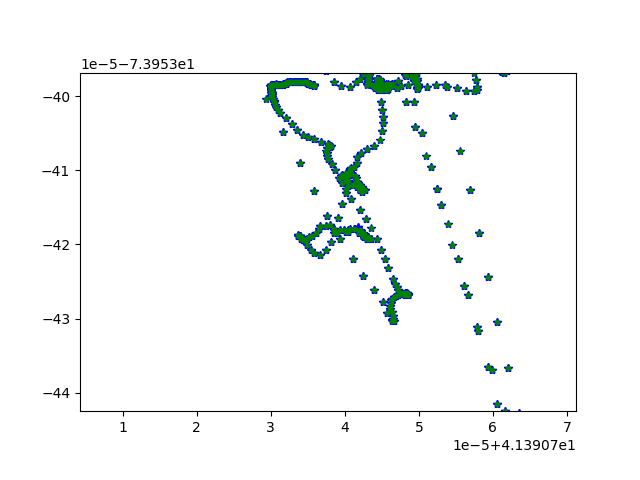

(41.390555645, 41.391681055, -73.95351319999999, -73.95238778999999)

In [6]:

%matplotlib notebook
ahr2_loc = pd.DataFrame(ahr2_list)

plt.figure(1)
plt.plot(ahr2_loc['Lat'], ahr2_loc['Lng'], 'b*')

gps_loc = pd.DataFrame(gps_list)
plt.plot(gps_loc['Lat'], gps_loc['Lng'], 'g.')
plt.axis('square')

